<a href="https://colab.research.google.com/github/Lcns99/regressaolinear/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [10]:
#criando a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [12]:
#criando o df iris
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
##transformando os dados em array
entrada = df_iris.iloc[:, :-1].values
target = df_iris.iloc[:,4]

In [18]:
#realizando a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split # função que divide o dataset
x_train, x_test, y_train, y_test = train_test_split(entrada, target, test_size= 0.20) #20% teste

In [25]:
#realizando o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #objeto que normaliza os dados
scaler.fit(x_train) #normaliza os dados
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
#treinando o modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5) #construção por meio de 5 vizinhos
classifier.fit(x_train,y_train) #aplica a classificação


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
#previsão
y_pred = classifier.predict(x_test)
y_pred

array([0., 1., 2., 1., 0., 2., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2., 1.,
       0., 2., 1., 2., 1., 2., 0., 1., 2., 2., 1., 1., 1.])

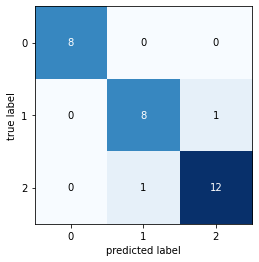

In [33]:
#plotando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat= matriz_confusao)
plt.show()